# 1. Problem Definition
> Based on the given data we need to predict if a patient has heart disease or not?

# 2. Data
> We have the data and have loaded it already

# 3. Evaluate
> In initial stages we need to make sure if our model gives us the accuracy of 95%

# 4. Features
> What features are import, what features columns means what

# Tools Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Importing models of SCIKIT-LEARN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Importing evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import plot_roc_curve

# Exploring the Data initial stage

1. What Problem I am going to solve?
2. What kind of data I have?
3. Does this sdata have missing values?
4. Are there any outliers, sporious vectors?
5. Can we add or remove some of the features?

In [2]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

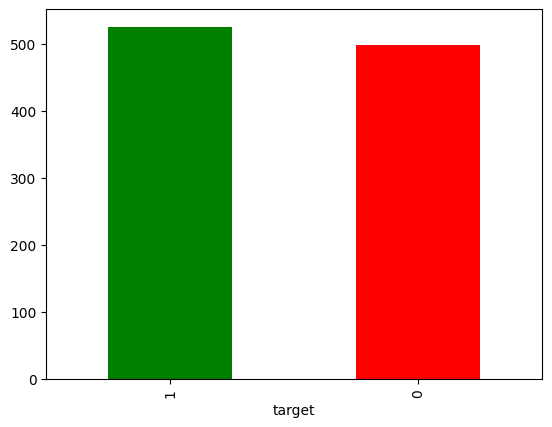

In [6]:
df['target'].value_counts().plot(kind='bar',color=['green', 'red'])

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [10]:
len(df)

1025

In [11]:
713 / 1025

0.6956097560975609

C:\Users\Neural Networks\AppData\Local\Temp\ipykernel_1400\120138371.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Females', 'Males');


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

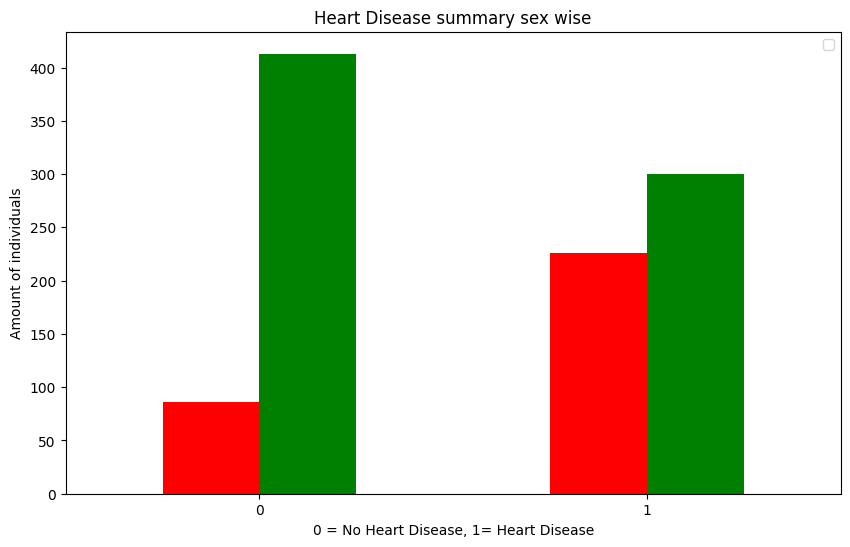

In [12]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                    color=['red', 'green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0 = No Heart Disease, 1= Heart Disease')
plt.ylabel('Amount of individuals')
plt.legend('Females', 'Males');
plt.xticks(rotation=0)

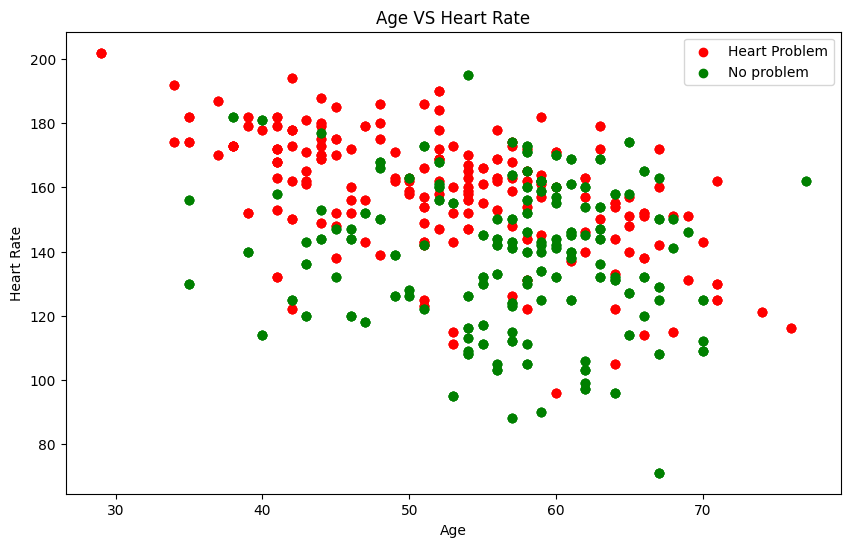

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='red');
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='green');

plt.title('Age VS Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Heart Problem', 'No problem'])

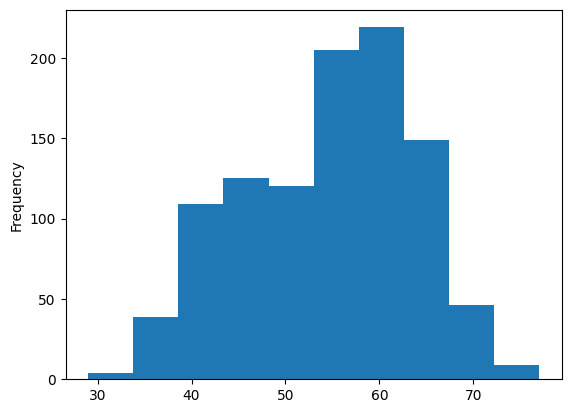

In [14]:
df.age.plot.hist();

# CP: chest pain type
### -- Value 1: typical angina
### -- Value 2: atypical angina
### -- Value 3: non-anginal pain
### -- Value 4: asymptomatic


In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


C:\Users\Neural Networks\AppData\Local\Temp\ipykernel_1400\15732611.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('No heart problem', 'heart problem')


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

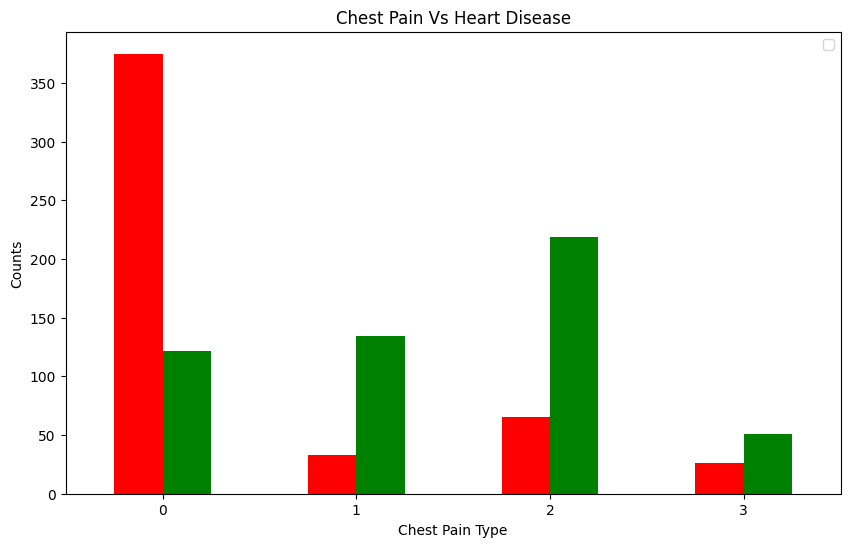

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                    color=['red', 'green']);
plt.title('Chest Pain Vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend('No heart problem', 'heart problem')
plt.xticks(rotation=0)

# Correlation Matrix

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


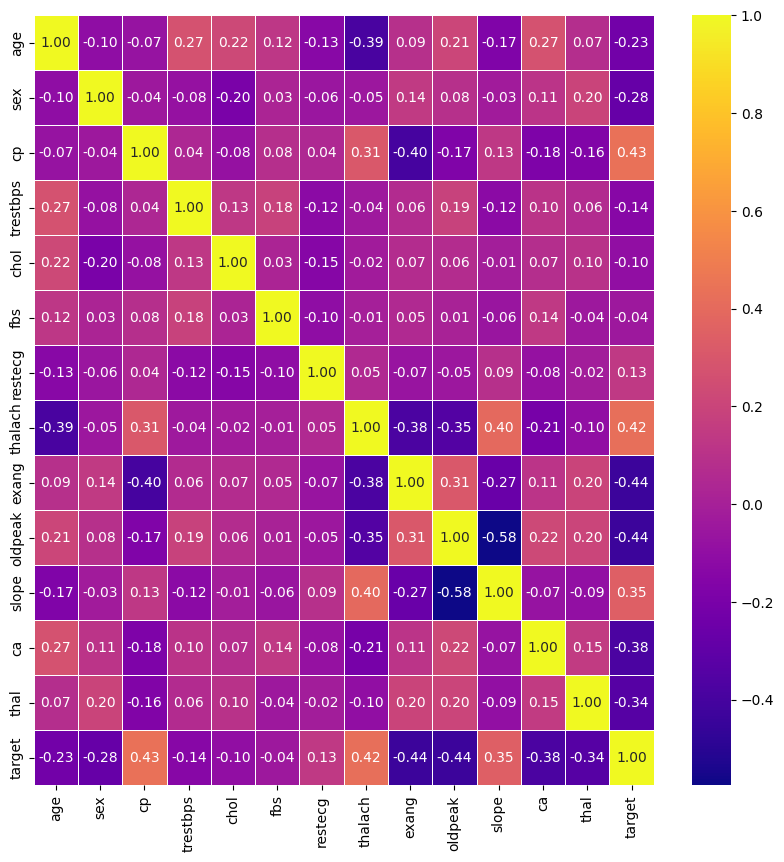

In [18]:
cor_map = df.corr()
home, room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot = True,
                  linewidth=0.5,
                  fmt="0.2f",
                  cmap='plasma')

In [19]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [20]:
x = df.drop("target", axis=1)
y = df['target']

In [21]:
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
len(x_train)


717

In [23]:
len(x_test)

308

In [24]:
308/717

0.4295676429567643

# The models are gonna use
### 1. K-Neearest Neighbours Classifier
### 2. Random Forest Classifier
### 3. Logistic Regression

In [25]:
models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(),
          'LR': LogisticRegression()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(7)
    model_scores = {}  # Corrected variable name
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores  # Moved return outside the loop

In [26]:
model_scores = fit_and_score(models=models,
                                x_train=x_train,
                                x_test=x_test,
                                y_train=y_train,
                                y_test=y_test)
print(model_scores)

{'KNN': 0.7142857142857143, 'RFC': 0.9902597402597403, 'LR': 0.8376623376623377}


C:\Users\Neural Networks\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

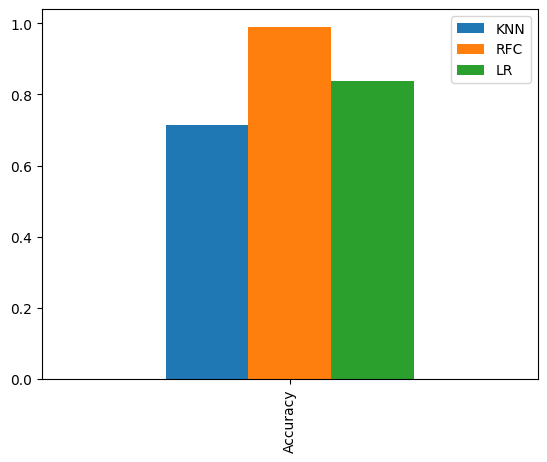

In [27]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.plot.bar()

# Improving and tuning
   #### Universal methods used for all classifications problems
    * Hyperparameter
    * Features improving
    
   #### Advanced Level
   * Confusion  Matrix
   * Cross validation
   * precision
   * recall
   * f1
   * classfication report
   * roc curve


In [28]:
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbors = range(1, 30)
# KNN instance
KNN = KNeighborsClassifier()
# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run fit for ith
    KNN.fit(x_train, y_train)
    train_score.append(KNN.score(x_train, y_train))
    test_score.append(KNN.score(x_test, y_test))


In [29]:
train_score

[1.0,
 0.9916317991631799,
 0.9790794979079498,
 0.8926080892608089,
 0.8675034867503487,
 0.8214783821478382,
 0.7796373779637378,
 0.7670850767085077,
 0.7559274755927475,
 0.7712691771269177,
 0.7656903765690377,
 0.7447698744769874,
 0.7461645746164575,
 0.7503486750348675,
 0.7391910739191074,
 0.7405857740585774,
 0.7447698744769874,
 0.7364016736401674,
 0.7405857740585774,
 0.7405857740585774,
 0.7531380753138075,
 0.7433751743375174,
 0.7489539748953975,
 0.7364016736401674,
 0.7391910739191074,
 0.7280334728033473,
 0.7238493723849372,
 0.7154811715481172,
 0.7112970711297071]

In [30]:
test_score

[0.987012987012987,
 0.9383116883116883,
 0.8896103896103896,
 0.7597402597402597,
 0.7142857142857143,
 0.724025974025974,
 0.7305194805194806,
 0.7175324675324676,
 0.7337662337662337,
 0.724025974025974,
 0.711038961038961,
 0.7077922077922078,
 0.7272727272727273,
 0.7272727272727273,
 0.724025974025974,
 0.6948051948051948,
 0.7045454545454546,
 0.7045454545454546,
 0.7012987012987013,
 0.6915584415584416,
 0.7045454545454546,
 0.6883116883116883,
 0.7175324675324676,
 0.7175324675324676,
 0.7305194805194806,
 0.7175324675324676,
 0.7045454545454546,
 0.6948051948051948,
 0.6948051948051948]

Max KNN Score: 98.701299%


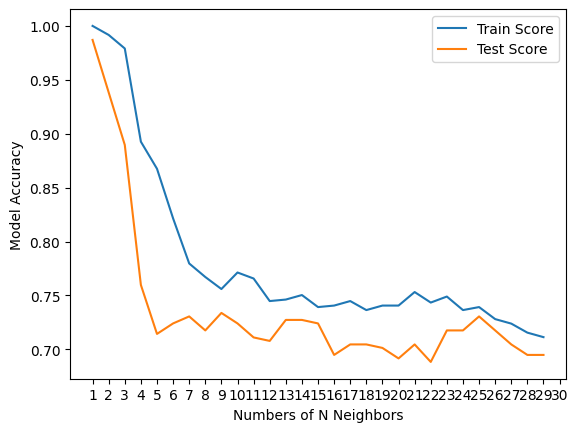

In [31]:
plt.plot(nneighbors, train_score, label="Train Score")
plt.plot(nneighbors, test_score, label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel("Numbers of N Neighbors")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"Max KNN Score: {max(test_score)*100:0f}%")

# Hyperparameter tuning using Randomized Search CV
    LogisticRegression()
    RandomForestClassfier

In [32]:
LR_HP = {
        "solver": ["liblinear"], 
         "C": np.logspace(-4, 4, 20)
}
RFC_HP = {
    "n_estimators": np.arange(1,101,50),
    "max_depth": [None,3,50],
    "min_samples_split": np.arange(2,8,2),
    "min_samples_leaf": np.arange(1,7,2) 
}


In [33]:
# tune logistic regression
np.random.seed(7)
# let use RSCV to tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_HP,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
lr.score(x_test, y_test)

0.8506493506493507

In [35]:
lr.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [36]:
# tune logistic regression
np.random.seed(7)
# let use RSCV to tune HP
rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_HP,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 50],
                                        'min_samples_leaf': array([1, 3, 5]),
                                        'min_samples_split': array([2, 4, 6]),
                                        'n_estimators': array([ 1, 51])},
                   verbose=True)

In [37]:
rfc.score(x_test, y_test)

0.9902597402597403

In [38]:
rfc.best_params_

{'n_estimators': np.int64(51),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1),
 'max_depth': 50}

# Hyperparameter tuning using GridSearch CV

In [39]:
# tune logistic regression
np.random.seed(7)
# let use RSCV to tune HP
gscv = GridSearchCV(RandomForestClassifier(),
                       param_grid=RFC_HP,
                       cv=5,
                       verbose=True)
# Fit the random HP search model for LR
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [40]:
gscv.score(x_test, y_test)

0.9902597402597403

In [41]:
gscv.best_params_

{'max_depth': 50,
 'min_samples_leaf': np.int64(1),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(51)}

## Improving and tuning the models
####    ADVANCED LEVEL
    ROC Curve
    Confusion Matrix
    Cross_validation
    Precision
    Recall
    f1
    Classification Report

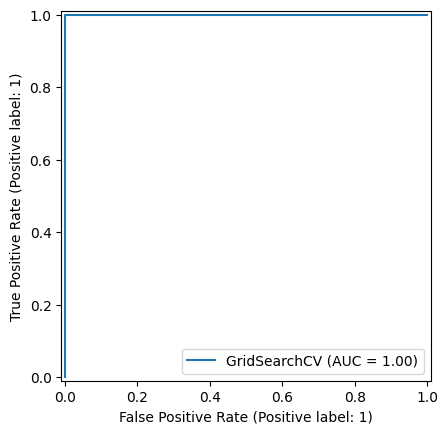

In [43]:
# Plotting area under the curve
# 
# plot_roc_curve(gscv, x_test, y_test)


from sklearn.metrics import RocCurveDisplay
y_preds = gscv.predict(x_test)
roc_curve_display = RocCurveDisplay.from_estimator(estimator=gscv, 
                                                   X=x_test, 
                                                   y=y_test)


In [44]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[141   0]
 [  3 164]]


This will plot the Confusion Matrix


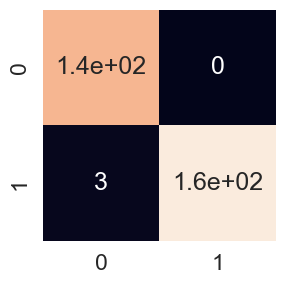

In [45]:
sns.set(font_scale=1.5)
def plot_confusion(y_test, y_preds):
    print("This will plot the Confusion Matrix")

    # fig, ax = plt.subplots(figsize(3,3))
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
plot_confusion(y_test, y_preds)

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.98      0.99       167

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [55]:
lr.best_params_
lr = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

In [57]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(lr, 
                             x,
                             y,
                             cv=7,
                             scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

np.float64(0.8438702291092562)

In [58]:
# Cross Validated Precision
cv_precision = cross_val_score(lr, 
                             x,
                             y,
                             cv=7,
                             scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8105313315767159)

In [59]:
# Cross Validated Recall
cv_recall = cross_val_score(lr, 
                             x,
                             y,
                             cv=7,
                             scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9087218045112782)

In [60]:
# Cross Validated F1
cv_f1 = cross_val_score(lr, 
                             x,
                             y,
                             cv=7,
                             scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8564907540515759)

# Visualizing the Cross Validated Metrices

<Axes: title={'center': 'Comparison Of the Matices'}>

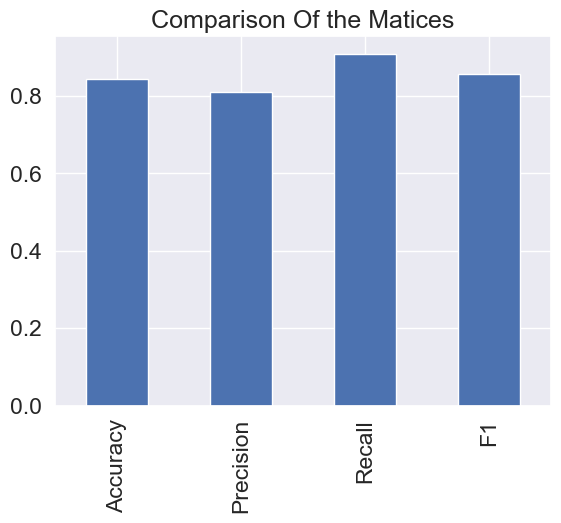

In [64]:
cv_plot =pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1":cv_f1,
}, index=[0])
cv_plot.T.plot.bar(title="Comparison Of the Matices",
                legend=False)

# Features Improving

In [65]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [66]:
# Check Coefficient
lr.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [67]:
lr.coef_

array([[-1.32929846e-03, -1.43273900e+00,  7.57280257e-01,
        -9.66158415e-03, -4.95792121e-03, -8.42765784e-02,
         5.08425711e-01,  2.96164868e-02, -8.56590775e-01,
        -4.72368215e-01,  4.59204402e-01, -6.19884375e-01,
        -7.05295928e-01]])

In [69]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': np.float64(-0.0013292984571081923),
 'sex': np.float64(-1.4327390046126613),
 'cp': np.float64(0.7572802568062507),
 'trestbps': np.float64(-0.009661584150606934),
 'chol': np.float64(-0.004957921205575682),
 'fbs': np.float64(-0.08427657837040851),
 'restecg': np.float64(0.5084257107773987),
 'thalach': np.float64(0.029616486843541276),
 'exang': np.float64(-0.856590775270983),
 'oldpeak': np.float64(-0.47236821474003676),
 'slope': np.float64(0.45920440162984744),
 'ca': np.float64(-0.6198843745423495),
 'thal': np.float64(-0.7052959284408661)}

<Axes: title={'center': 'Featuers Importance'}>

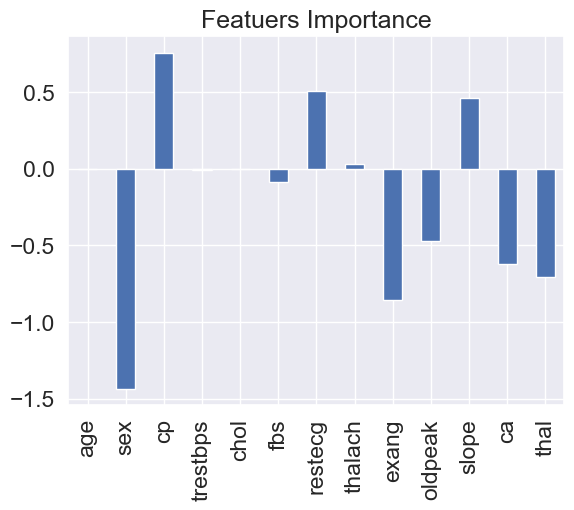

In [72]:
features = pd.DataFrame(final_coef, index=[0])
features.T.plot.bar(title="Featuers Importance",
                   legend=False)

# Conclusion

* We set 95% accuracy goal, but we did not meet
* We can ask some Questions
* What if we try to get more data
* What if we try to improve the quality of the data